In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib notebook

BTC = "./BTC-USD.csv"

In [9]:
btc = pd.read_csv(BTC, index_col=0, parse_dates=True, usecols= [0,5], header=0, names=['date', 'close'])
btc['dailyReturn'] = btc['close'].pct_change()
btc['sd'] = btc.dailyReturn.rolling(91).std() * math.sqrt(365)
btc.tail(20)

,close,dailyReturn,sd
date,,,
2022-03-08,38737.26953,0.017740,0.671310
2022-03-09,41982.92578,0.083786,0.693105
2022-03-10,39437.46094,-0.060631,0.694617
2022-03-11,38794.97266,-0.016291,0.695093
2022-03-12,38904.01172,0.002811,0.688789
2022-03-13,37849.66406,-0.027101,0.689750
2022-03-14,39666.75391,0.048008,0.684498
2022-03-15,39338.78516,-0.008268,0.684639
2022-03-16,41143.92969,0.045887,0.683740


<IPython.core.display.Javascript object>


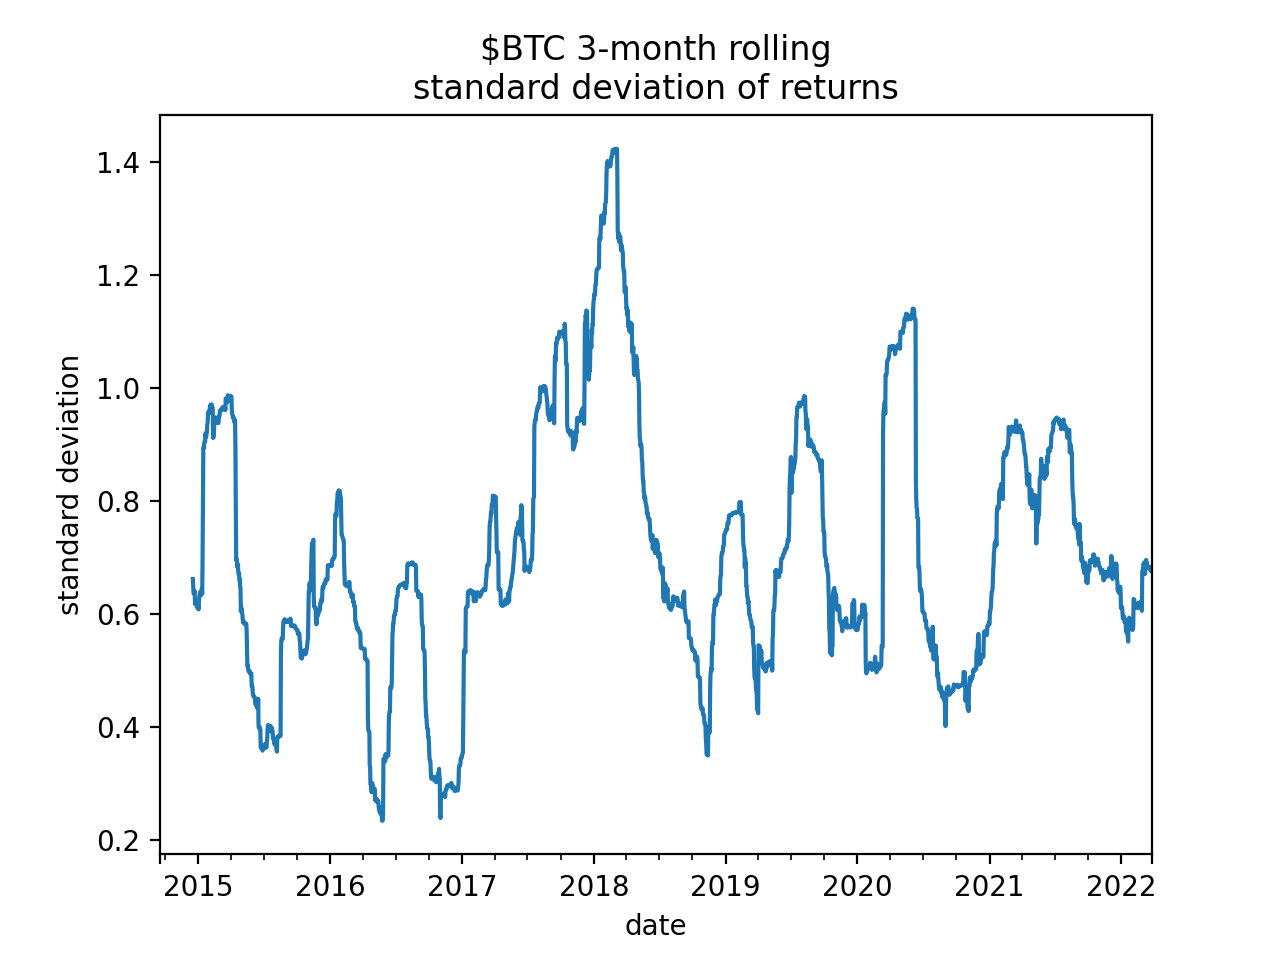

<AxesSubplot:title={'center':'$BTC 3-month rolling\nstandard deviation of returns'}, xlabel='date', ylabel='standard deviation'>

In [11]:
fig1, ax1 = plt.subplots()
plt.ylabel("standard deviation")
plt.title("$BTC 3-month rolling\nstandard deviation of returns")
btc.sd.plot(ax=ax1)

In [4]:
btcm = pd.DataFrame(btc.dailyReturn.resample("W").apply(lambda x: ((x + 1).cumprod() - 1).last("D")))
btcm.rename(columns={'dailyReturn': 'weeklyReturn'}, inplace=True)
btcm['sd'] = btcm.weeklyReturn.rolling(13).std() * math.sqrt(52)


<IPython.core.display.Javascript object>


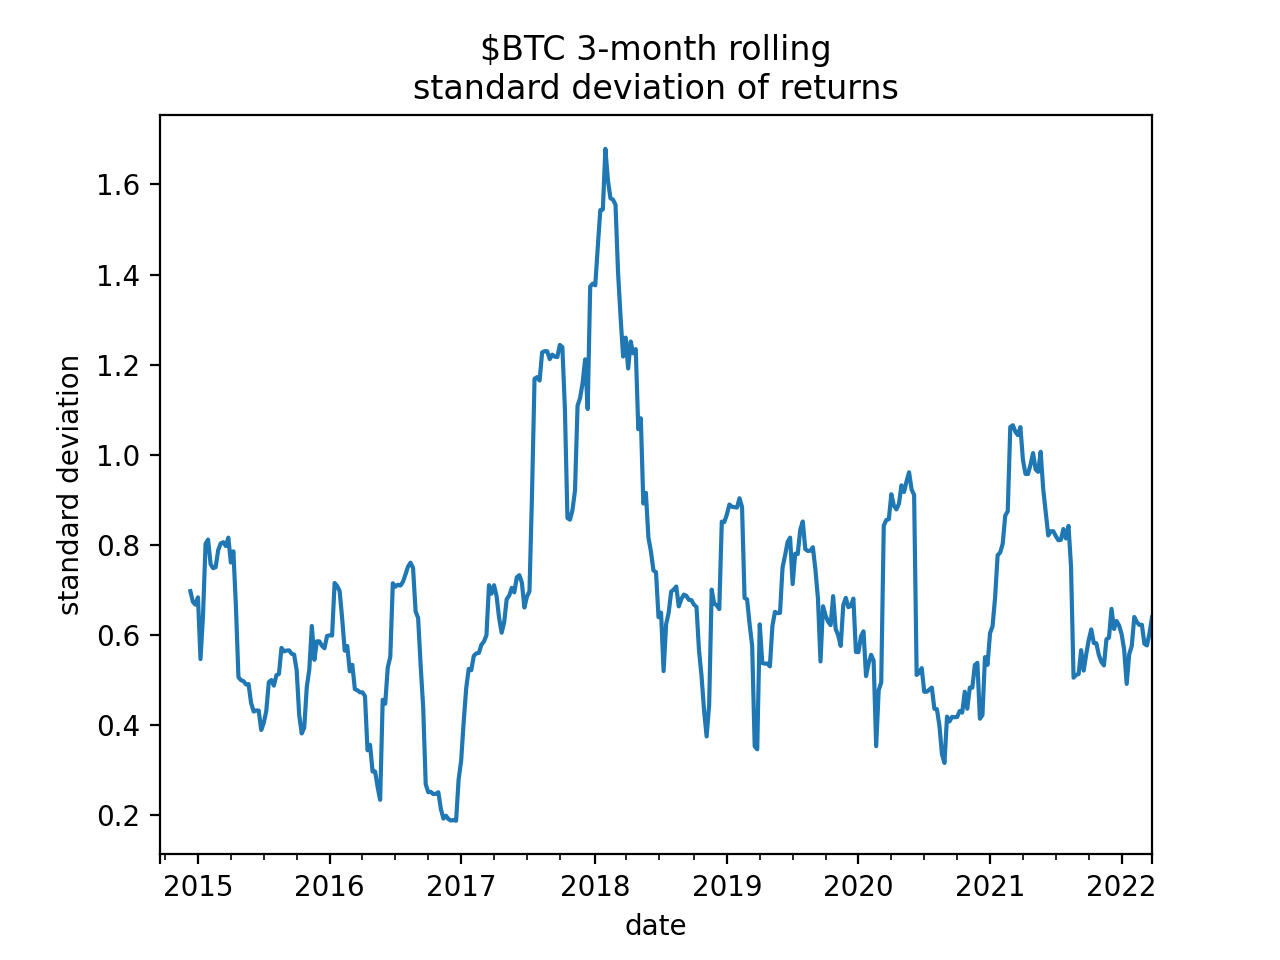

<AxesSubplot:title={'center':'$BTC 3-month rolling\nstandard deviation of returns'}, xlabel='date', ylabel='standard deviation'>

In [5]:
fig1, ax1 = plt.subplots()
plt.ylabel("standard deviation")
plt.title("$BTC 3-month rolling\nstandard deviation of returns")
btcm.sd.plot(ax=ax1)